# First notebook - Data housing

### imports
In this section we import consumable libraries for the experiment.
"LocalOutlierFactor", "EllipticEnvelope", "OneClassSVM", "IsolationForest" library for base algorithm detection algorithms.
"train_test_split" For the purpose of splitting the data for training and testing.
"tables" This is a function we created to create tables.
"pandas" for visualization.
"dect_function" These are functions that activate the new combinations of anomaly detection algorithms that we test.

An explanation of each algorithm for identifying the base and new anomalies is written in the working document.

In [1]:
import dect_function
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tables
import pandas as pd


### Part 1
### Boot Algorithms Detection of anomalies and 
### Running the algorithms
In this section we run the algorithms for detecting base anomalies from a sklearn library and test their performance by comparing them with the results of a linear regression run before and after.
For each algorithm we have selected the parameters which give it the best results and therefore there may be a change in the parameters for different data sets.
Finally, we print for each algorithm its metric indices in the order.
Next we will put into a table


In [2]:
algos = [LocalOutlierFactor(n_neighbors=20, algorithm="auto", leaf_size=30, metric="minkowski", p=2, metric_params=None, contamination="auto", novelty=False, n_jobs=None),
    EllipticEnvelope( store_precision=True, assume_centered=False, support_fraction=None, contamination=0.02, random_state=None),
    OneClassSVM(kernel="rbf", degree=3, gamma="scale", coef0=0, tol=0.001, nu=0.001, shrinking=True, cache_size=200, verbose=False, max_iter=-1),
    IsolationForest(n_estimators=100, max_samples="auto", contamination=0.1, max_features=2, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)]

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
url = "../data_sets/housing.csv"

df = pd.read_csv(url)
acc = dect_function.improvement_test_regression(df,algos)
for ac in acc:
    print(ac)

{'mean_squared_error': 24.144548895007826, 'mean_absolute_error': 3.656168318002472}
{'mean_squared_error': 23.382530603640745, 'mean_absolute_error': 3.589724440612474}
{'mean_squared_error': 23.307758110628146, 'mean_absolute_error': 3.5814804658333386}
{'mean_squared_error': 24.20886496867871, 'mean_absolute_error': 3.664276154456175}
{'mean_squared_error': 23.436366319615782, 'mean_absolute_error': 3.5145990964414846}


The results are in a neat table with the names of the algorithms and metrics.

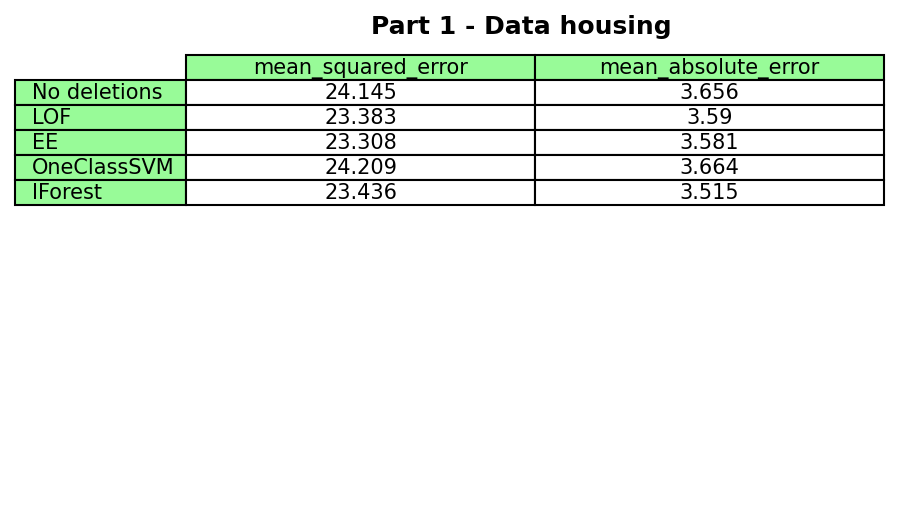

In [3]:
tables.algo_alone(acc ,"Part 1 - Data housing")

### Part 2
### 4 experiments of combinations

First experiment - delete any deviation we received in the algorithm we saw improvement in the previous step.
Then measuring the accuracy with the metrics

In [4]:
acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3]])
# acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3],algos[2]])
print(acc2)
#[algos[0],algos[1],algos[3],algos[2]]

{'mean_squared_error': 23.61080146153847, 'mean_absolute_error': 3.5173936288672816}


Second experiment - connecting each line (the exception marking line) of each algorithm we saw improvement and then deleting the most negative ones (marking the exceptions in all the algorithms).
Then measuring the accuracy with the metrics.

In [5]:
acc3 = dect_function.Add_and_delete(df,[algos[0],algos[1],algos[3]])
print(acc3)

{'mean_squared_error': 24.003094400382633, 'mean_absolute_error': 3.6632127433325206}


Third Experiment - Measuring a unfiromic mean on the results of a fit function on the efficient algorithms (except for algorithm 0 which is not appropriate) and deleting a certain percentage of anomalies.
Then perform metrics.
(See details of the experiment in the attached document)

In [6]:

acc4 = dect_function.uniformy_average(df,[algos[1],algos[3]])
print(acc4)

{'mean_squared_error': 24.333513249594375, 'mean_absolute_error': 3.673798291887887}


Fourth experiment - the same idea of experiment 3 but with different probabilities according to the level of usefulness of the algorithm in part 1 in relation to the data set.

In [7]:

algos2 = [algos[1],algos[3]]
ratio = [0.3,0.7]

acc5 = dect_function.ratio_average(df,algos2,ratio,10)
print(acc5)

{'mean_squared_error': 25.51195620918338, 'mean_absolute_error': 3.7806100064364188}


Displays the results for each experiment in the table along with metrics

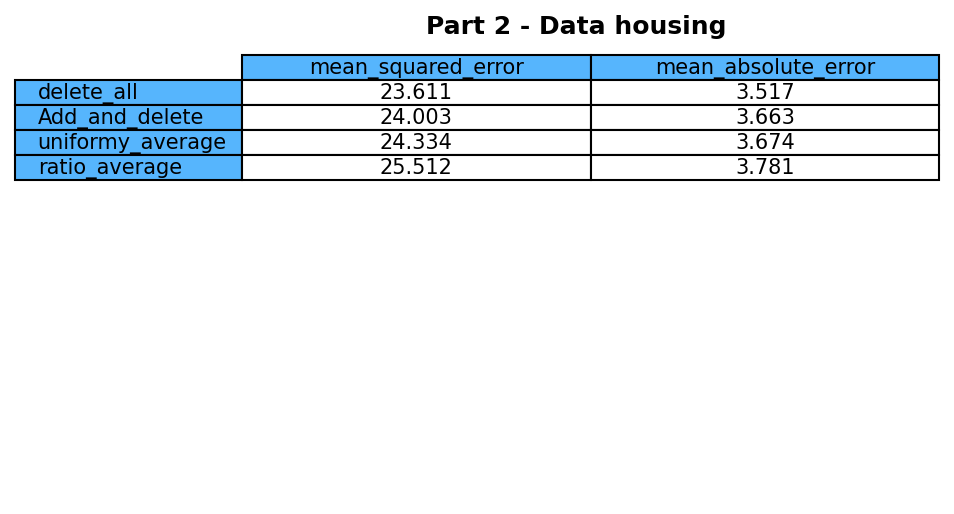

In [8]:
val2 = ["delete_all","Add_and_delete","uniformy_average","ratio_average"]
list_acc = [acc2,acc3,acc4,acc5]

tables.part2(list_acc,"Part 2 - Data housing",val2)

### Part 3


In this section we run the combination algorithm (see details in the attached document) when we re-type its metrics for each algorithm and for the combination algorithm we print the new list of the anomalies (1 anomaly, -1 non-anomaly) for each metric separately.
Finally we present the metric results in the table.

In [9]:

best_result = acc[0].copy()
dd = dect_function.combination(df,algos,best_result)

for a in acc:
    print(a)
acc.append(best_result)
print(dd)

{'mean_squared_error': 24.144548895007826, 'mean_absolute_error': 3.656168318002472}
{'mean_squared_error': 23.382530603640745, 'mean_absolute_error': 3.589724440612474}
{'mean_squared_error': 23.307758110628146, 'mean_absolute_error': 3.5814804658333386}
{'mean_squared_error': 24.20886496867871, 'mean_absolute_error': 3.664276154456175}
{'mean_squared_error': 23.436366319615782, 'mean_absolute_error': 3.5145990964414846}
{'mean_squared_error': array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,

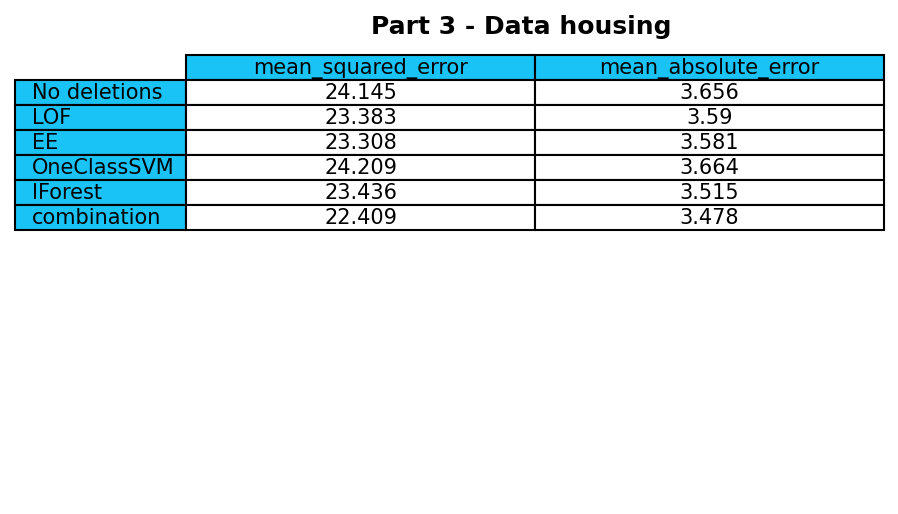

In [10]:
tables.algo_combination(acc,"Part 3 - Data housing")